## DataLoaders 


In [9]:
import numpy as np
import pandas as pd

## Custom Dataset & Dataloader

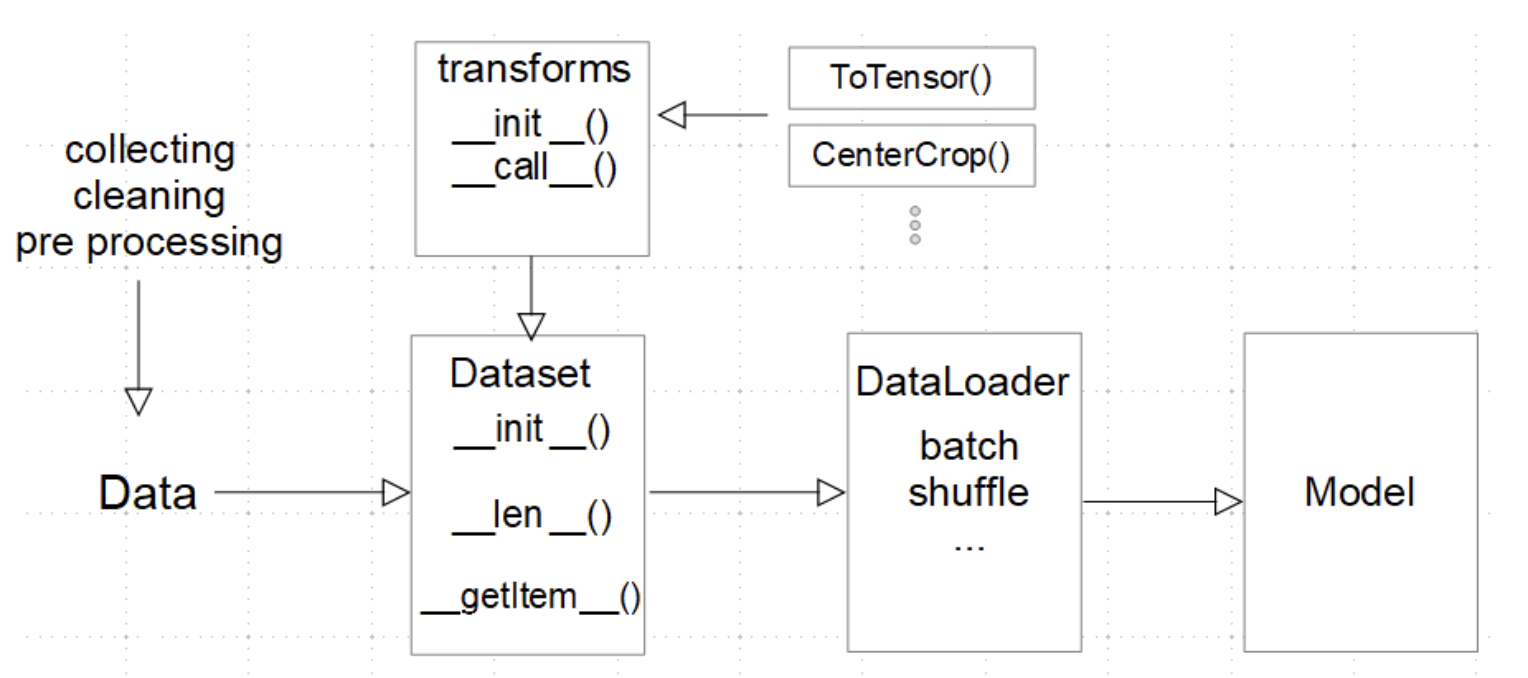

https://www.oreilly.com/library/view/deep-learning-with/9781789534092/3a1c563f-8dd5-4532-b3d1-2e324694a4d3.xhtml

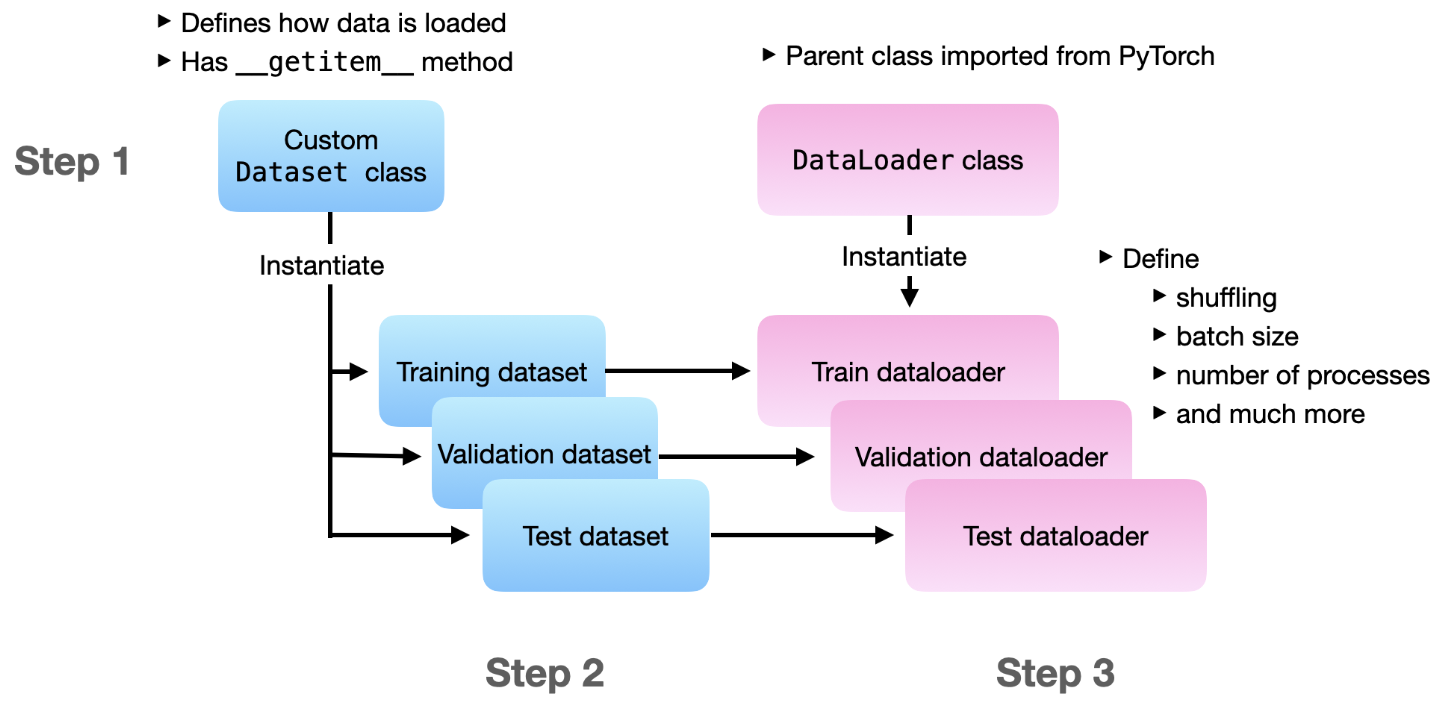

https://sebastianraschka.com/blog/2022/datapipes.html

In [10]:
# We are creating a dummy dataset to understand Datasets and Dataloaders better
# For simplicity, int the following case we can assume xs to input and ys to be target

xs = list(range(10))
ys = list(range(10,20))
print('xs values: ', xs)
print('ys values: ', ys)

xs values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ys values:  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [11]:
data = zip(xs, ys) # creates zip object (essentially an iterator of collection of tuples)
print(type(data), "zipped")
print()
data = list(zip(xs,ys)) # creates a list of tuples
print("list of zipped", data)
print()
print(data[0]) # returns the tuple (x[0], y[0])

<class 'zip'> zipped

list of zipped [(0, 10), (1, 11), (2, 12), (3, 13), (4, 14), (5, 15), (6, 16), (7, 17), (8, 18), (9, 19)]

(0, 10)


In [12]:
data_x, data_y = zip([xs,ys])  # creates a list of two tuples

In [13]:
data_x, data_y

(([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],),
 ([10, 11, 12, 13, 14, 15, 16, 17, 18, 19],))

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

# Dataset class will have access to the data or contain the data
# And will be used by the dataloader class to access parts of it
# Dataloader will use it to create batches, process data etc.

# torch.utils.data.Dataset is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:
# __len__ so that len(dataset) returns the size of the dataset.
# __getitem__ to support the indexing such that dataset[i] can be used to get ith sample.

# dataset class essentially provides receipte for loading pairs of data (x, y)


class MyDataset(Dataset):
    # constructor
    # In this case it contains the data
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys

    # len()
    # returns the length of the dataset
    def __len__(self):
        return len(self.xs)  # len(self.ys)

    # []
    # returns the item at index i
    # this tells how a single data point is loaded
    def __getitem__(self, i):
        return self.xs[i], self.ys[i]

In [15]:
# Create an instance of MyDataset class
dataset = MyDataset(xs, ys)
print(dataset[0]) # returns the tuple (x[2], y[2])
# This is basically same as 
print(dataset.__getitem__(0))
# Which the dataloader needs

(0, 10)
(0, 10)


In [16]:
# Let's lookt at different ways of creating the Dataloader object using the Dataloader class

#batch size of 1, so we the size of x and y is 1 and no shuffling
for x, y in DataLoader(dataset):
    print(x,y)

tensor([0]) tensor([10])
tensor([1]) tensor([11])
tensor([2]) tensor([12])
tensor([3]) tensor([13])
tensor([4]) tensor([14])
tensor([5]) tensor([15])
tensor([6]) tensor([16])
tensor([7]) tensor([17])
tensor([8]) tensor([18])
tensor([9]) tensor([19])


In [17]:
# batch size of 2, so x and y both have a size of 2
# note that x and y pairs are kept matched
for x, y in DataLoader(dataset, batch_size=3):
    print(x,y)

tensor([0, 1, 2]) tensor([10, 11, 12])
tensor([3, 4, 5]) tensor([13, 14, 15])
tensor([6, 7, 8]) tensor([16, 17, 18])
tensor([9]) tensor([19])


In [18]:
# enumerate - this works the same way as the loops above except that it gives an index as well
# shuffle is True so we get shuffled xs and ys
for index, (x, y) in enumerate(DataLoader(dataset, batch_size=3, shuffle=True)):
    print("index: ", index, "x,y:", x,y)

index:  0 x,y: tensor([3, 9, 6]) tensor([13, 19, 16])
index:  1 x,y: tensor([0, 1, 8]) tensor([10, 11, 18])
index:  2 x,y: tensor([5, 7, 4]) tensor([15, 17, 14])
index:  3 x,y: tensor([2]) tensor([12])


In [19]:
# Create an object of the Dataloader Class
train_loader_args = dict(shuffle=True, batch_size=3, num_workers=0, pin_memory=True) 
train_loader = DataLoader(dataset, **train_loader_args)

In [20]:
# enumerate
for index, (x, y) in enumerate(train_loader):
    print("index: ", index, "x,y:", x,y)

index:  0 x,y: tensor([8, 0, 3]) tensor([18, 10, 13])
index:  1 x,y: tensor([4, 5, 7]) tensor([14, 15, 17])
index:  2 x,y: tensor([9, 1, 6]) tensor([19, 11, 16])
index:  3 x,y: tensor([2]) tensor([12])


##### example

In [4]:
# Creating a simple toy example

# Define x and y as two tensors
x = torch.randn(100, 5)  # Let's say 100 samples, each with 5 features
y = torch.randn(100, 3)  # Corresponding 100 context samples, each with 3 features

# Settings dictionary 's' for the size of the test set and batch size
s = {
    "test_set_size": 20,  # size of the test set
    "batch_size": 10,  # size of each batch
}

# Split the data into training and test batches
train_batches, test_batches = random_split(
    TensorDataset(x, y),
    (x.size(0) - s["test_set_size"], s["test_set_size"]),
)

# Wrap the split data into DataLoader for easy batch processing
train_batches = DataLoader(train_batches, s["batch_size"], shuffle=True)
test_batches = DataLoader(test_batches, s["batch_size"], shuffle=False)

# Now, train_batches and test_batches are DataLoader objects
# train_batches[i] and test_batches[i] are not directly accessible like list indexing
# Instead, they are iterated over in a loop

# Displaying the type of train_batches to confirm
type(train_batches), type(test_batches)

(torch.utils.data.dataloader.DataLoader,
 torch.utils.data.dataloader.DataLoader)